In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('possum.csv')
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,tail,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   tail      104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [4]:
for c in df.columns:
    x = df[c].isna().sum()
    y = df[c].count()
    print(f"Col: {c} | missing: {x} , missing % {x/y * 100}")

df = df.dropna()
df.shape

Col: case | missing: 0 , missing % 0.0
Col: site | missing: 0 , missing % 0.0
Col: Pop | missing: 0 , missing % 0.0
Col: sex | missing: 0 , missing % 0.0
Col: age | missing: 2 , missing % 1.9607843137254901
Col: hdlngth | missing: 0 , missing % 0.0
Col: skullw | missing: 0 , missing % 0.0
Col: totlngth | missing: 0 , missing % 0.0
Col: tail | missing: 0 , missing % 0.0
Col: footlgth | missing: 1 , missing % 0.9708737864077669
Col: earconch | missing: 0 , missing % 0.0
Col: eye | missing: 0 , missing % 0.0
Col: chest | missing: 0 , missing % 0.0
Col: belly | missing: 0 , missing % 0.0


(101, 14)

In [5]:
## Label encoding sex
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])

In [6]:
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,tail,footlgth,earconch,eye,chest,belly
0,1,1,Vic,1,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,0,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,0,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,0,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,0,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


##  Regression plot

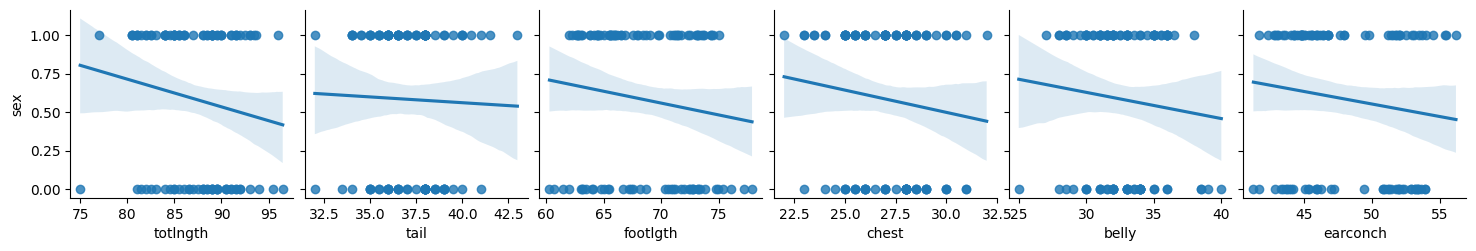

In [7]:
import seaborn as sns
sns.pairplot(df, x_vars=["totlngth", "tail", "footlgth", "chest", "belly", "earconch"], y_vars=['sex'], kind='reg')

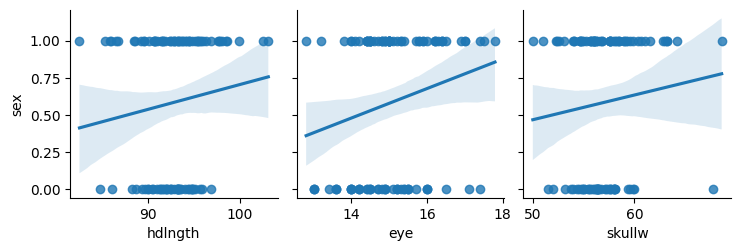

In [8]:
sns.pairplot(df, x_vars=["hdlngth", "eye", "skullw"], y_vars=['sex'], kind='reg')

# Outlier Treatment

<Axes: >

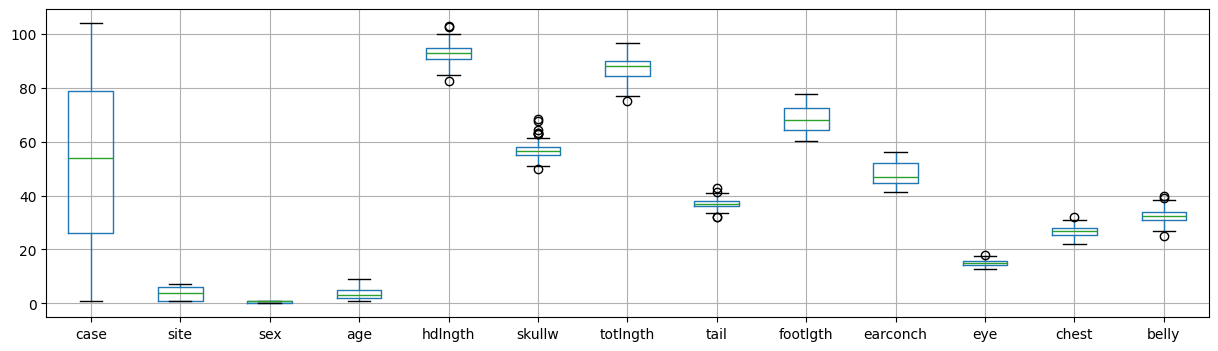

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 4))
df.boxplot()

In [10]:
cols = ['hdlngth', 'skullw', 'tail', 'eye', 'chest', "belly"]

def detect_limits(col, df):
    q1, q3 = df[col].quantile(0.25),  df[col].quantile(0.75)
    iqr = q3 - q1
    upr, lwr = ( (q3) + (1.5*iqr)) , ((q1) - (1.5*iqr))
    return lwr, upr

In [11]:
lwr_skullw, upr_skullw = detect_limits("skullw" ,df)
df[ (df['skullw'] < lwr_skullw) | (df['skullw'] > upr_skullw)  ]

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,tail,footlgth,earconch,eye,chest,belly
16,17,1,Vic,0,1.0,94.7,67.7,89.5,36.5,73.2,53.2,14.7,29.0,31.0
47,48,3,other,1,5.0,98.6,63.2,85.0,34.0,66.9,44.9,17.0,28.0,35.0
53,54,4,other,1,7.0,96.9,63.0,91.5,43.0,71.3,46.0,17.5,30.0,36.5
54,55,4,other,1,2.0,103.1,63.2,92.5,38.0,72.5,44.9,16.4,30.5,36.0
57,58,4,other,1,3.0,94.5,64.2,91.0,39.0,66.5,46.4,14.4,30.5,33.0
58,59,4,other,1,2.0,102.5,62.8,96.0,40.0,73.2,44.5,14.7,32.0,36.0
78,79,6,other,1,1.0,85.8,50.0,81.0,36.5,62.8,43.0,14.8,22.0,28.5
97,98,7,other,1,5.0,93.2,68.6,84.0,35.0,65.6,44.3,14.5,28.5,32.0


In [12]:
lwr, upr = detect_limits("tail" ,df)
df[ (df['tail'] < lwr) | (df['tail'] > upr)  ]

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,tail,footlgth,earconch,eye,chest,belly
41,42,2,Vic,1,3.0,85.3,54.1,77.0,32.0,62.7,51.2,13.8,25.5,33.0
42,43,2,Vic,0,2.0,90.0,55.5,81.0,32.0,72.0,49.4,13.4,29.0,31.0
53,54,4,other,1,7.0,96.9,63.0,91.5,43.0,71.3,46.0,17.5,30.0,36.5
86,87,7,other,1,2.0,98.5,60.7,93.0,41.5,71.7,46.8,15.0,26.0,36.0


In [13]:
## Remove ouliers
for col in cols:
    lwr, upr = detect_limits(col ,df)
    df = df[ (df[col] > lwr) & (df[col] < upr)  ]

<Axes: >

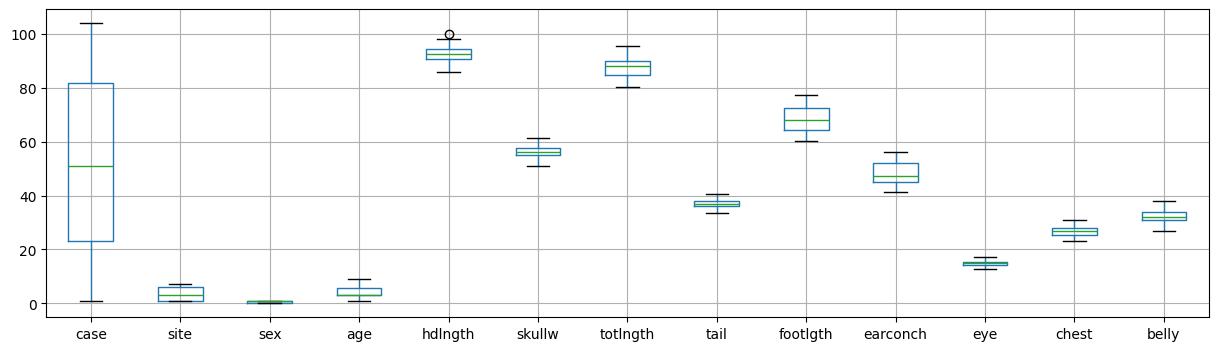

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 4))
df.boxplot()

In [15]:
df.shape

(82, 14)

## Training and testing the models

In [16]:
from sklearn.model_selection import train_test_split
X = df.drop(['case', 'site', 'Pop', 'sex'], axis=1)
y = df['sex']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [17]:
y_train.shape

(57,)

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


### Decision Tree

In [19]:
dc  = DecisionTreeClassifier()
dc.fit(X_train, y_train)
dc_preds_df = X_test.copy()
dc_preds_df['Act'] = y_test
dc_preds_df['Pred'] = dc.predict(X_test)



In [20]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(dc_preds_df['Act'], dc_preds_df['Pred'])
print(cm)
cr = classification_report(dc_preds_df['Act'] ,dc_preds_df['Pred'])
print(cr)

[[10  4]
 [ 3  8]]
              precision    recall  f1-score   support

           0       0.77      0.71      0.74        14
           1       0.67      0.73      0.70        11

    accuracy                           0.72        25
   macro avg       0.72      0.72      0.72        25
weighted avg       0.72      0.72      0.72        25



### KNN

In [21]:
from math import sqrt
k = sqrt(y_train.shape[0])
k

7.54983443527075

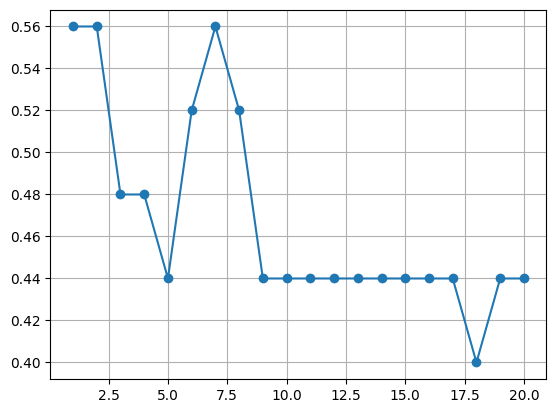

In [22]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

scores = []

for i in range(1, 21):
    knn1 = KNeighborsClassifier(n_neighbors=i)
    knn1.fit(X_train, y_train)
    scores.append(knn1.score(X_test, y_test))
    
plt.plot(range(1,21), scores, marker='o')
plt.grid()
plt.show()

In [23]:
knn  = KNeighborsClassifier(n_neighbors=9, p=2)
knn.fit(X_train, y_train)
knn_preds_df = X_test.copy()
knn_preds_df['Act'] = y_test
knn_preds_df['Pred'] = knn.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(knn_preds_df['Act'], knn_preds_df['Pred'])
print(cm)
cr = classification_report(knn_preds_df['Act'] ,knn_preds_df['Pred'])
print(cr)

[[5 9]
 [5 6]]
              precision    recall  f1-score   support

           0       0.50      0.36      0.42        14
           1       0.40      0.55      0.46        11

    accuracy                           0.44        25
   macro avg       0.45      0.45      0.44        25
weighted avg       0.46      0.44      0.44        25



### Random Forest

In [25]:
rf  = RandomForestClassifier(n_estimators=7)
rf.fit(X_train, y_train)
rf_preds_df = X_test.copy()
rf_preds_df['Act'] = y_test
rf_preds_df['Pred'] = rf.predict(X_test)

In [26]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(rf_preds_df['Act'], rf_preds_df['Pred'])
print(cm)
cr = classification_report(rf_preds_df['Act'] ,rf_preds_df['Pred'])
print(cr)

[[6 8]
 [3 8]]
              precision    recall  f1-score   support

           0       0.67      0.43      0.52        14
           1       0.50      0.73      0.59        11

    accuracy                           0.56        25
   macro avg       0.58      0.58      0.56        25
weighted avg       0.59      0.56      0.55        25



### Logistic Regression 

In [27]:
lr  = LogisticRegression(max_iter=800)
lr.fit(X_train, y_train)
lr_preds_df = X_test.copy()
lr_preds_df['Act'] = y_test
lr_preds_df['Pred'] = lr.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(lr_preds_df['Act'], lr_preds_df['Pred'])
print(cm)
cr = classification_report(lr_preds_df['Act'] ,lr_preds_df['Pred'])
print(cr)

[[6 8]
 [5 6]]
              precision    recall  f1-score   support

           0       0.55      0.43      0.48        14
           1       0.43      0.55      0.48        11

    accuracy                           0.48        25
   macro avg       0.49      0.49      0.48        25
weighted avg       0.49      0.48      0.48        25



## Finding Hyperparameter

In [29]:
from sklearn.model_selection import GridSearchCV
## parameter to be tuned
tuned_parameters = [{ 'n_estimators': range(2,50) , 'criterion': ['gini', 'entropy']} ]
dt = RandomForestClassifier()
grid = GridSearchCV(estimator=dt, param_grid=tuned_parameters)
grid.fit(X_train, y_train)
grid.best_params_, grid.best_score_


({'criterion': 'gini', 'n_estimators': 10}, 0.6803030303030304)

In [30]:
rank_test_score = pd.DataFrame(grid.cv_results_).sort_values('rank_test_score')
rank_test_score.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,0.039947,0.003909,0.005317,0.001813,gini,10,"{'criterion': 'gini', 'n_estimators': 10}",0.750000,0.833333,0.636364,0.727273,0.454545,0.680303,0.129135,1
26,0.105323,0.015972,0.009558,0.002722,gini,28,"{'criterion': 'gini', 'n_estimators': 28}",0.583333,0.666667,0.909091,0.636364,0.545455,0.668182,0.127525,2
83,0.059239,0.002337,0.004664,0.000827,entropy,37,"{'criterion': 'entropy', 'n_estimators': 37}",0.666667,0.666667,0.727273,0.636364,0.636364,0.666667,0.033195,3
49,0.008195,0.000762,0.002772,0.000303,entropy,3,"{'criterion': 'entropy', 'n_estimators': 3}",0.666667,0.750000,0.727273,0.727273,0.454545,0.665152,0.108880,4
29,0.145616,0.047549,0.015109,0.004494,gini,31,"{'criterion': 'gini', 'n_estimators': 31}",0.583333,0.666667,0.636364,0.818182,0.545455,0.650000,0.093939,5


In [32]:
from sklearn.model_selection import RandomizedSearchCV
tuned_parameters = [{ 'n_estimators': range(2,50) , 'criterion': ['gini', 'entropy']} ]
dt = RandomForestClassifier()
grid = RandomizedSearchCV(estimator=dt, param_distributions=tuned_parameters, n_iter=30, scoring="accuracy")

In [33]:
grid.fit(X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=30,
                   param_distributions=[{'criterion': ['gini', 'entropy'],
                                         'n_estimators': range(2, 50)}],
                   scoring='accuracy')

In [34]:
grid.best_estimator_, grid.best_params_, grid.best_score_

(RandomForestClassifier(n_estimators=14),
 {'n_estimators': 14, 'criterion': 'gini'},
 0.7196969696969696)